In [1]:
import numpy as np
import pandas as pd
import os 

In [2]:
for dirname, _, filenames in os.walk('/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/petrol_consumption.csv
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/sales_prediction_regression_models.ipynb
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/linear_regression_scikitLearn.ipynb
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/linear_regression_fit_dummyData.ipynb
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/sales_prediction_linear_regression.ipynb
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/Dummy Data HSS.csv
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/advertising.csv
/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/student_scores.csv


In [3]:
# Business Problems
# For example:

# How should we allocate our limited marketing budget for next year?
# What type on influencers should we focus on?
# Can we cut budget from TV, as it is too expensive?
# Finally, set your assumptions of the marketing budget and influencer (if any). 
# Can you try to predict the expected sales based on the best ML model?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('/home/pydev/workflow/dt_learn_data_science/edureka/ML-Practices/Dummy Data HSS.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [7]:
df = df.fillna(df.mean(numeric_only=True))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4572 non-null   float64
 1   Radio         4572 non-null   float64
 2   Social Media  4572 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4572 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [8]:
# Now we have a dataframe that has no missing values. 
# Now, we want to encode the categorical variable to dummy variables, as follows

df = pd.get_dummies(df)
df.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


In [9]:
df = df[['TV', 'Radio', 'Social Media', 'Influencer_Macro','Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]
df.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181


In [10]:
df.corr()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
TV,1.000000,0.866885,0.527010,0.021335,-0.012630,-0.004863,-0.003645,0.996652
Radio,0.866885,1.000000,0.606793,0.009518,-0.005071,0.004212,-0.008601,0.867369
Social Media,0.527010,0.606793,1.000000,0.011631,0.013072,-0.013312,-0.011351,0.528121
Influencer_Macro,0.021335,0.009518,0.011631,1.000000,-0.332131,-0.331171,-0.328482,0.019267
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.332131,1.000000,-0.338211,-0.335465,-0.011701
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.331171,-0.338211,1.000000,-0.334495,-0.004099
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.328482,-0.335465,-0.334495,1.000000,-0.003289
Sales,0.996652,0.867369,0.528121,0.019267,-0.011701,-0.004099,-0.003289,1.000000


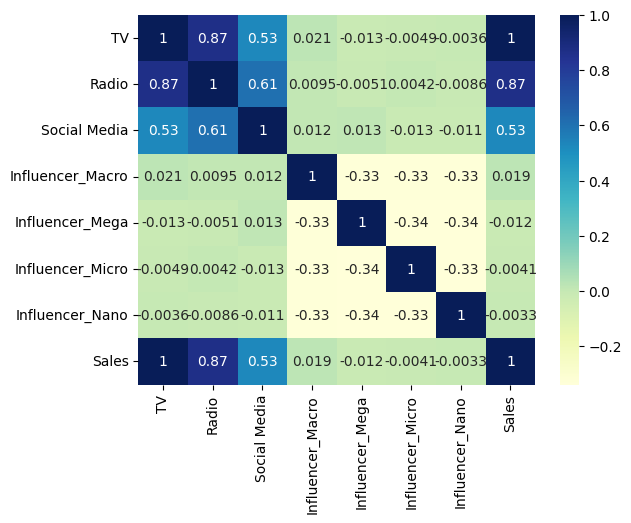

In [11]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

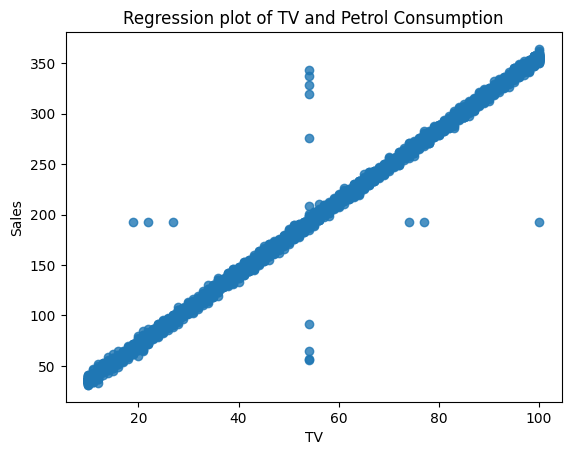

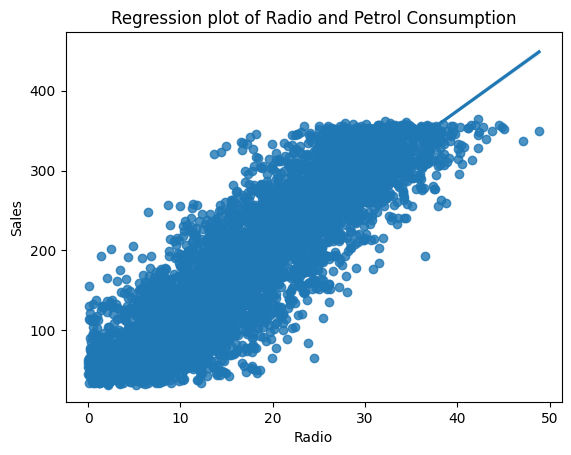

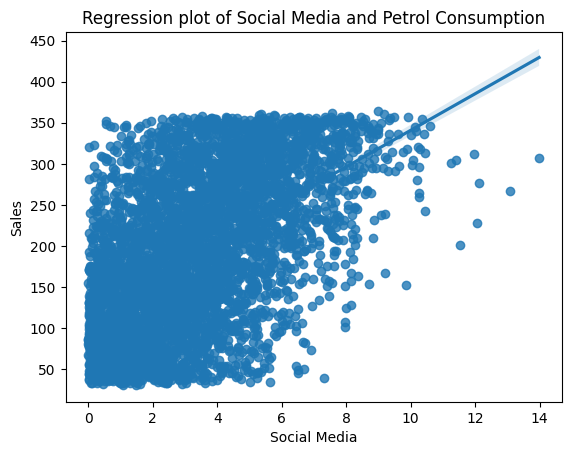

In [12]:
variables = ['TV', 'Radio', 'Social Media']
for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Sales', data=df).set(title=f'Regression plot of {var} and Petrol Consumption')

In [13]:
y = df['Sales']
X = df[['TV', 'Radio', 'Social Media']]

In [14]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)

In [15]:
X.shape

(4572, 3)

In [16]:
ax_regressor = LinearRegression()
ax_regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
ax_regressor.intercept_

0.05524906631242743

In [18]:
ax_regressor.coef_

array([3.5112574 , 0.13177259, 0.06802915])

In [19]:
feature_names = X.columns
feature_names

Index(['TV', 'Radio', 'Social Media'], dtype='object')

In [20]:
feature_names = X.columns
model_coefficients = ax_regressor.coef_

In [21]:
coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])

In [22]:
coefficients_df

,Coefficient value
TV,3.511257
Radio,0.131773
Social Media,0.068029


In [23]:
ax_regressor.score(X_test, y_test)

0.9924495666736649

In [24]:
y_pred = ax_regressor.predict(X_test)

In [25]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
538,90.054222,91.594914
1822,222.741668,219.741851
534,102.774790,103.253368
2119,328.239378,327.059885
561,351.807328,353.047304
...,...,...
744,244.865923,241.695370
733,130.478749,125.726952
2647,251.403637,249.302455
4149,253.172404,248.265137


In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 2.83
Mean squared error: 63.02
Root mean squared error: 7.94


In [27]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9924495666736649


In [28]:
ax_regressor.score(X_test, y_test)

0.9924495666736649

In [29]:
ax_regressor.score(X_train, y_train)

0.9935794604146435

In [30]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1:].values
# x = df['TV']
# y = df['Sales']

In [31]:
x

array([[16.        ,  6.56623079,  2.90798277, ...,  1.        ,
         0.        ,  0.        ],
       [13.        ,  9.23776457,  2.4095672 , ...,  1.        ,
         0.        ,  0.        ],
       [41.        , 15.88644602,  2.91341018, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [44.        , 19.80007236,  5.09619187, ...,  0.        ,
         1.        ,  0.        ],
       [71.        , 17.5346403 ,  1.94087322, ...,  0.        ,
         0.        ,  0.        ],
       [42.        , 15.96668752,  5.04654763, ...,  0.        ,
         1.        ,  0.        ]])

In [32]:
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [34]:
x_train.shape

(3429, 7)

In [35]:
y_train.shape

(3429, 1)

In [36]:
y_test.shape

(1143, 1)

In [37]:
lr_regressor = LinearRegression()
lr_regressor.fit(x_train, y_train)

y_pred_lr = lr_regressor.predict(x_test)

print(r2_score(y_test, y_pred_lr))
print(mse(y_test, y_pred_lr)**0.5)

0.9938370407956197


TypeError: 'numpy.float64' object is not callable

In [ ]:
lr_regressor.coef_

array([[ 3.50571141,  0.13904893,  0.07011217, -0.46548238,  0.17010434,
         0.21100225,  0.08437579]])

In [ ]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer_Macro', 'Influencer_Mega',
       'Influencer_Micro', 'Influencer_Nano', 'Sales'],
      dtype='object')

In [ ]:
lr_regressor.intercept_

array([0.1285431])

#### Other Way

In [ ]:
y = df["Radio"].values.reshape(-1,1)
X = df["Sales"].values.reshape(-1,1)

<AxesSubplot: title={'center': 'Scatterplot of sales by Radio'}, xlabel='Sales', ylabel='Radio'>

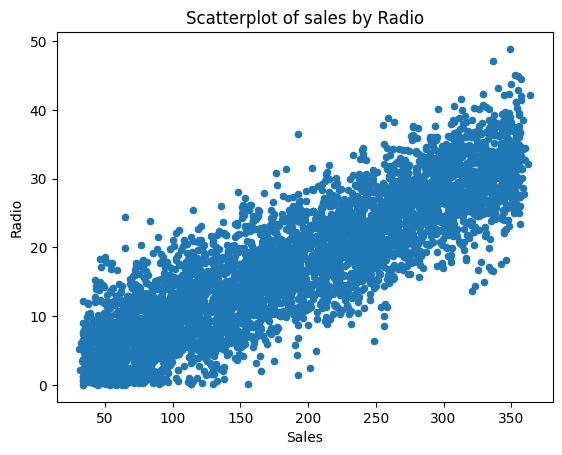

In [ ]:
df.plot.scatter(x='Sales', y='Radio', title='Scatterplot of sales by Radio')

In [ ]:
SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

In [ ]:
aw_regressor = LinearRegression()
aw_regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
aw_regressor.intercept_

array([0.81295229])

In [ ]:
aw_regressor.coef_

array([[0.09003394]])

In [ ]:
def calc(slope, intercept, hours):
    return slope*hours+intercept

In [ ]:
score = calc(aw_regressor.coef_, aw_regressor.intercept_, 15.88)
print(score) 

[[2.24269133]]


In [ ]:
score = aw_regressor.predict([[15.886446]])
print(score)

[[2.24327168]]


In [ ]:
y_pred = aw_regressor.predict(X_test)
y_pred

array([[ 8.92088914],
       [20.86726323],
       [10.06617206],
       [30.36563819],
       [32.48755369],
       [24.39885769],
       [32.31236988],
       [13.45509433],
       [24.6352347 ],
       [ 5.82552135],
       [13.24688919],
       [11.36267688],
       [29.45720991],
       [18.85588788],
       [14.80131602],
       [27.9575671 ],
       [22.89312172],
       [11.34878893],
       [27.72250852],
       [22.24004837],
       [18.05294077],
       [32.33998862],
       [10.750654  ],
       [ 9.70666708],
       [15.42581316],
       [32.10446662],
       [ 5.80116534],
       [15.50701068],
       [20.58154196],
       [33.08298512],
       [23.2883809 ],
       [15.37888135],
       [32.49254735],
       [26.20708018],
       [ 6.1354721 ],
       [ 5.2806986 ],
       [ 8.0102646 ],
       [29.78118285],
       [11.62759482],
       [22.87977037],
       [25.45273142],
       [14.10829372],
       [14.63825477],
       [15.8471185 ],
       [31.44058859],
       [26

In [ ]:
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_pred.squeeze()})
print(df_preds)

        Actual  Predicted
0     1.218354   8.920889
1    14.949791  20.867263
2    10.377258  10.066172
3    26.469274  30.365638
4    36.876302  32.487554
..         ...        ...
910  18.167834  22.859197
911  19.156498  12.560469
912  25.228580  23.447813
913  16.123668  23.607062
914  28.989318  23.335101

[915 rows x 2 columns]


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse= np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 3.78
Mean squared error: 22.58
Root mean squared error: 4.75


In [ ]:
df.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181
